# İş Uygulaması: Şirket İçi Eğitimin Performans Etkisi Ölçümü

## Problem
### Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor.

## Detaylar:
### Bir departman bir konuda eğitim talep ediyor.
### Gerekli/gereksiz değerlendirmeleri neticesinde eğitim alınıyor.
### Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.
### Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns

In [75]:
# eğitimden önce kişilerin performanslarına yönelik veriler
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])


# eğitimden sonra kişilerin performanslarına yönelik veriler
sonrasi = pd.DataFrame([118, 127, 122, 132, 129, 123, 129, 132, 128, 130, 128, 138, 140, 130, 134, 134,
                       124, 140, 134, 129, 129, 138, 134, 124, 122, 126, 133, 127, 130, 130, 130, 132,
                       117, 130, 125, 129, 133, 120, 127, 123])

In [76]:
ayrik = pd.concat([oncesi, sonrasi], axis=1)
ayrik.columns = ['Oncesi', 'Sonrasi']

grup_oncesi = np.arange(len(oncesi))
grup_oncesi = pd.DataFrame(grup_oncesi)
grup_oncesi[:] = 'Oncesi'
a = pd.concat([grup_oncesi, oncesi], axis=1)


grup_sonrasi = np.arange(len(sonrasi))
grup_sonrasi = pd.DataFrame(grup_sonrasi)
grup_sonrasi[:] = 'Sonrasi'
b = pd.concat([grup_sonrasi, sonrasi], axis=1)

concat = pd.concat([a, b])
concat.columns = ['Gruplar', 'Performans']

In [77]:
concat.head()

,Gruplar,Performans
0,Oncesi,123
1,Oncesi,119
2,Oncesi,119
3,Oncesi,116
4,Oncesi,123


In [78]:
concat.tail()

,Gruplar,Performans
35,Sonrasi,129
36,Sonrasi,133
37,Sonrasi,120
38,Sonrasi,127
39,Sonrasi,123


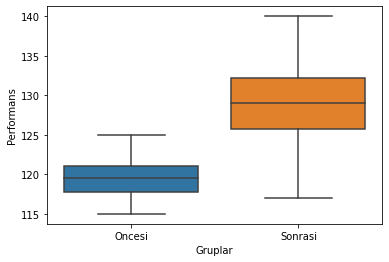

In [79]:
sns.boxplot(data=concat, x='Gruplar', y='Performans');

### Şuanda istatistiksel olarak net bir yorum yapamasak da boxplot grafiğinden görüldüğü üzere eğitimden sonra gözle görülür düzeyde gelişme yaşanmış.

# Varsayım Kontrolleri

In [80]:
from scipy.stats import shapiro
import scipy.stats as stats

In [81]:
shapiro(ayrik.Oncesi)

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

In [83]:
shapiro(ayrik.Sonrasi)

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

### Normallik varsayımını yukarıda test ettiğimizde görüldüğü üzere iki veri setininde p-value değerleri alfa değerimizden (0.05) az olmadığı için H0 hipotezini reddedemiyoruz.

In [84]:
stats.levene(ayrik.Oncesi, ayrik.Sonrasi)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

### Varyansların Homojenliği varsayımımızın p-value değeri de alfa değerinden küçük. Yani H0 hipotezini reddetmemiz gerekiyor.

## 2 varsayım testinden bir tanesi reddedildi. Ya veri setleri üzerinde aykırı değerler ile ilgili bir çalışma yapılacak, ya da varyans homojenliği varsayımının sonucu göz ardı edilecek.

# Hipotez Testi

In [87]:
t_statistic, p_value = stats.ttest_rel(ayrik.Oncesi, ayrik.Sonrasi)
print('Test İstatistiği: %.4f, P-Value: %.4f' % (t_statistic, p_value))

Test İstatistiği: -9.2815, P-Value: 0.0000


### p-value değeri alfa değerinden küçük olduğu için H0 hipotezi reddedilir. H0 hipotezi, eğitimden önce kişilerin performansıyla, eğitimden sonra kişilerin performansı arasında fark yoktur tezini savunuyordu. H0 hipotezi reddedildiği için bunun doğru olmadığını gördük. Yani şirkette eğitime katılan personeller pozitif anlamda gelişme göstermişlerdir.

# Nonparametrik Bağımlı İki Örneklem Testi

In [89]:
test_statistic, p_value = stats.wilcoxon(ayrik.Oncesi, ayrik.Sonrasi)
print('Test İstatistiği: %.4f, P-Value: %.4f' % (test_statistic, p_value))

Test İstatistiği: 15.0000, P-Value: 0.0000


### Bu testimizde de görüleceği üzere p-değeri alfa değerinden küçük. Yani H0 hipotezi reddedildi.